In [129]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import os

In [130]:
db_path = os.path.join('..', 'dev.duckdb')
con = duckdb.connect(db_path)
df = con.execute("SELECT * FROM main.stg_consumer_complaints").df()

In [131]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (62516, 15)
Columns: ['complaint_id', 'date_submitted', 'date_received', 'state', 'product', 'sub_product', 'issue', 'sub_issue', 'submitted_via', 'company_response_to_consumer', 'company_public_response', 'contact_channel', 'resolution_type', 'product_group', 'response_days']


In [132]:
df['month'] = pd.to_datetime(df['date_received']).dt.to_period('M')
df['year'] = pd.to_datetime(df['date_received']).dt.year

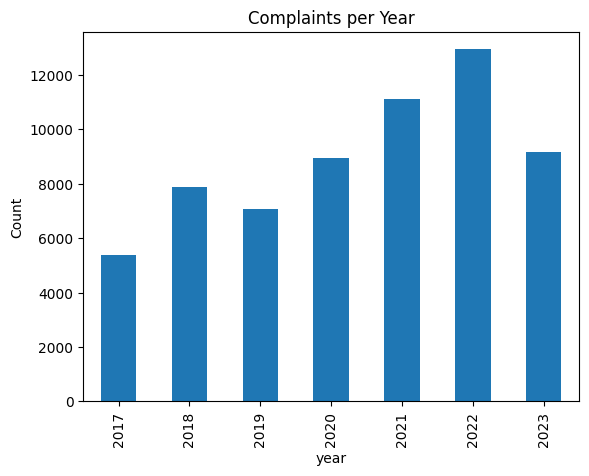

In [133]:
df['year'].value_counts().sort_index().plot(kind='bar', title='Complaints per Year')
plt.ylabel('Count')
plt.show()

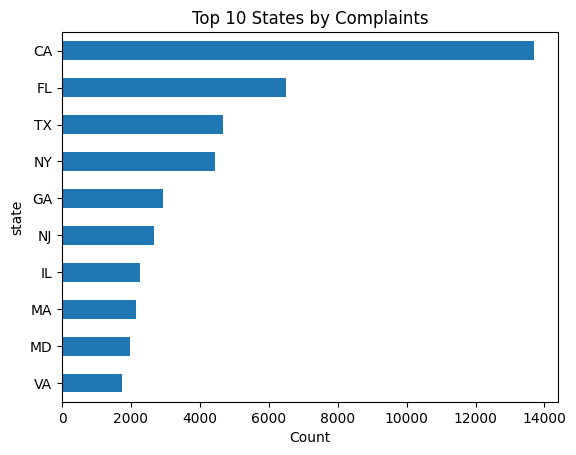

In [134]:
df['state'].value_counts().head(10).plot(kind='barh', title='Top 10 States by Complaints')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.show()

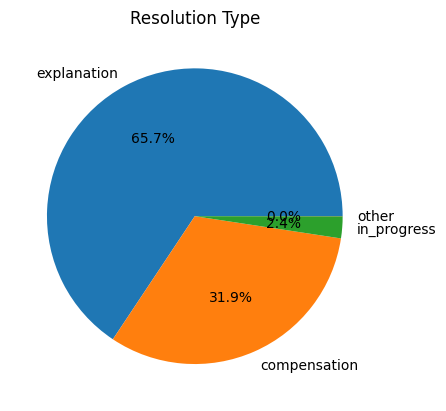

In [135]:
df['resolution_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Resolution Type')
plt.ylabel('')
plt.show()

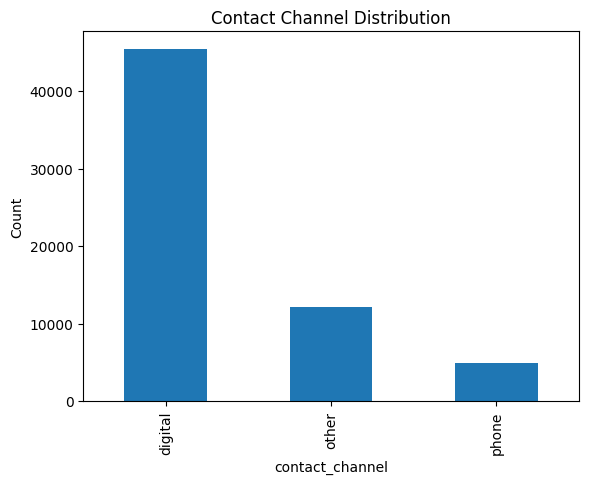

In [136]:
df['contact_channel'].value_counts().plot(kind='bar', title='Contact Channel Distribution')
plt.ylabel('Count')
plt.show()

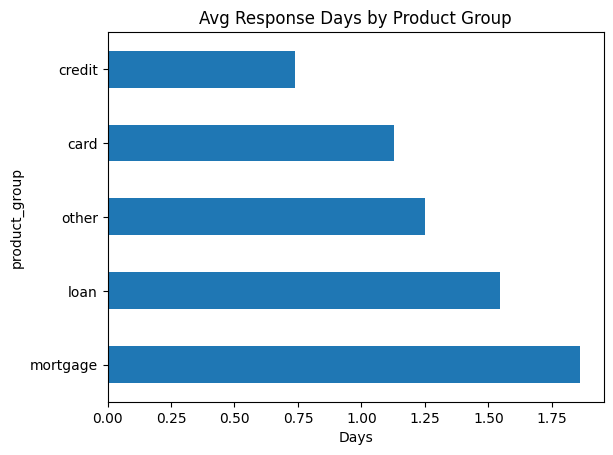

In [137]:
df.groupby('product_group')['response_days'].mean().sort_values().plot(kind='barh', title='Avg Response Days by Product Group')
plt.xlabel('Days')
plt.gca().invert_yaxis()
plt.show()

In [142]:
con.close()